In [1]:
import pandas as pd
import networkx as nx
import seaborn as sns

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

In [92]:
df = pd.read_pickle("GAM_norm-0.1-HIST1.interactions.csv.pkl")

In [93]:
df.reset_index(level=0, inplace=True)


In [5]:
df.shape

(204404, 5)

In [10]:
df = df.sort_values("Score",ascending=False)

In [94]:
df = df[df['Distance'] != 0]

In [95]:
my_list = []
for i in df.index:
    w1 = df.at[i,'Window1']
    w2 = df.at[i,'Window2']
    end1 = int(w1.split("-")[-1])
    end2 = int(w2.split("-")[-1]) 
    if end1 < end2:
        my_list.append(w1+w2)
    if end1 > end2:
        my_list.append(w2+w1)
    if end1 == end2:
        print "error"

In [96]:
df["id"] = my_list

In [97]:
df.shape

(204244, 6)

In [99]:
df = df.drop_duplicates(subset="id")
df.shape

(201099, 6)

In [100]:
new_df = df.sort_values("Score",ascending=False).head(30000)

In [13]:
new_df

,Window1,Window2,Score,Distance,Chromosome
92257,chr13:23100000-23130000,chr13:66420000-66450000,1.000000,1444.0,chr13
185480,chr13:23850000-23880000,chr13:12690000-12720000,1.000000,372.0,chr13
197444,chr13:23340000-23370000,chr13:23040000-23070000,1.000000,10.0,chr13
190535,chr13:22830000-22860000,chr13:13470000-13500000,1.000000,312.0,chr13
198856,chr13:23520000-23550000,chr13:12690000-12720000,1.000000,361.0,chr13
200619,chr13:23670000-23700000,chr13:12690000-12720000,1.000000,366.0,chr13
197686,chr13:22470000-22500000,chr13:13470000-13500000,1.000000,300.0,chr13
189336,chr13:21780000-21810000,chr13:12690000-12720000,1.000000,303.0,chr13
177658,chr13:22320000-22350000,chr13:13470000-13500000,1.000000,295.0,chr13
178236,chr13:23580000-23610000,chr13:12690000-12720000,1.000000,363.0,chr13


In [101]:
window_list = new_df['Window1'].tolist()+new_df['Window2'].tolist()
window_list = list(set(window_list))
window_list = sorted(window_list,key=lambda x:int(x.split("-")[-1]))

In [103]:
len(window_list)

2636

In [104]:
mat = pd.DataFrame(0.0, index=window_list, columns=window_list)

In [53]:
new_df.shape

(30000, 5)

In [125]:
for x in new_df:
    print x

Window1
Window2
Score
Distance
Chromosome
id


In [105]:
for i in new_df.index.tolist():
    a = new_df.at[i,'Score']
    mat.at[new_df.at[i,'Window1'],new_df.at[i,'Window2']] = a
    mat.at[new_df.at[i,'Window2'],new_df.at[i,'Window1']] = a 

In [85]:
new_df.Score.sum()

10937.869939386845

In [86]:
count = 0
for i in window_list:
    for j in window_list:
        if mat.at[i,j] < 1:
            count += 1
count

6209884

In [80]:
len(list(set(mat.columns)))

2492

In [106]:
mat.isnull().values.any()

False

In [91]:
(mat>0).sum().sum()

54692

In [66]:
new_df[new_df['Score'] == 1].sort_values('Distance')

,Window1,Window2,Score,Distance,Chromosome
31604,chr13:22920000-22950000,chr13:23040000-23070000,1.0,4.0,chr13
160898,chr13:23040000-23070000,chr13:22920000-22950000,1.0,4.0,chr13
11848,chr13:23040000-23070000,chr13:23190000-23220000,1.0,5.0,chr13
171900,chr13:23190000-23220000,chr13:23040000-23070000,1.0,5.0,chr13
197444,chr13:23340000-23370000,chr13:23040000-23070000,1.0,10.0,chr13
11853,chr13:23040000-23070000,chr13:23340000-23370000,1.0,10.0,chr13
180951,chr13:23370000-23400000,chr13:23040000-23070000,1.0,11.0,chr13
11854,chr13:23040000-23070000,chr13:23370000-23400000,1.0,11.0,chr13
72518,chr13:22650000-22680000,chr13:23040000-23070000,1.0,13.0,chr13
160890,chr13:23040000-23070000,chr13:22650000-22680000,1.0,13.0,chr13


/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


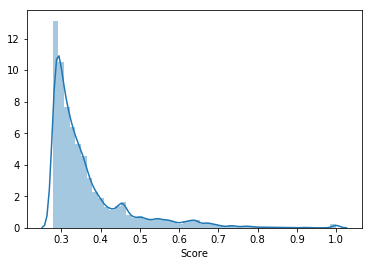

In [59]:
sns.distplot(new_df.Score)

In [41]:
mat.set_value(new_df.at[i,'Window1'],new_df.at[i,'Window2'],new_df.at[i,'Score'])
mat.at[new_df.at[i,'Window1'],new_df.at[i,'Window2']]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


0

In [43]:

mat.at[new_df.at[i,'Window1'],new_df.at[i,'Window2']]

0

In [20]:
%matplotlib inline

[[]]

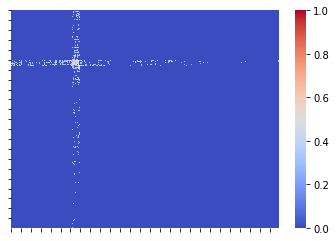

In [128]:
pal = sns.dark_palette("palegreen", as_cmap=True)
g=sns.heatmap(mat,cmap='coolwarm')
g.set(xticklabels=[])
g.set(yticklabels=[])

In [132]:
fig = g.get_figure()
fig.savefig("test.png",dpi=400)

In [131]:
import matplotlib.pylab as plt
plt.savefig("test.png")

<Figure size 432x288 with 0 Axes>

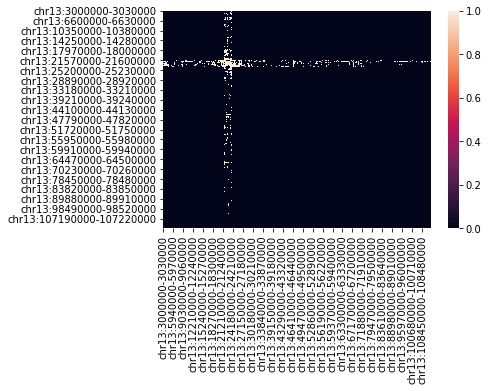

In [119]:
sns.heatmap((mat > 0).astype(int))

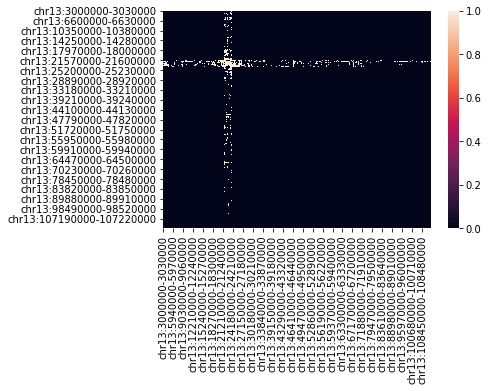

In [120]:
sns.heatmap((mat.T > 0).astype(int))

In [115]:
mat.T

,chr13:3000000-3030000,chr13:3030000-3060000,chr13:3060000-3090000,chr13:3090000-3120000,chr13:3120000-3150000,chr13:3150000-3180000,chr13:3180000-3210000,chr13:3210000-3240000,chr13:3240000-3270000,chr13:3270000-3300000,...,chr13:117180000-117210000,chr13:117240000-117270000,chr13:117420000-117450000,chr13:117480000-117510000,chr13:117750000-117780000,chr13:117780000-117810000,chr13:117930000-117960000,chr13:119220000-119250000,chr13:119940000-119970000,chr13:120270000-120284312
chr13:3000000-3030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr13:3030000-3060000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr13:3060000-3090000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr13:3090000-3120000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr13:3120000-3150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr13:3150000-3180000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr13:3180000-3210000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr13:3210000-3240000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr13:3240000-3270000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chr13:3270000-3300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
